In [ ]:
import pandas as pd
import numpy as np

# The Problem

Transit agencies across the world are faced with a common problem of how to deploy limited resources to maximize usefulness to their community. The question often comes down to this: **if we place a new bus stop or route at a particular location, how many people would use it?** 

To answer this question, it would be valuable to develop a model to predict transit ridership.

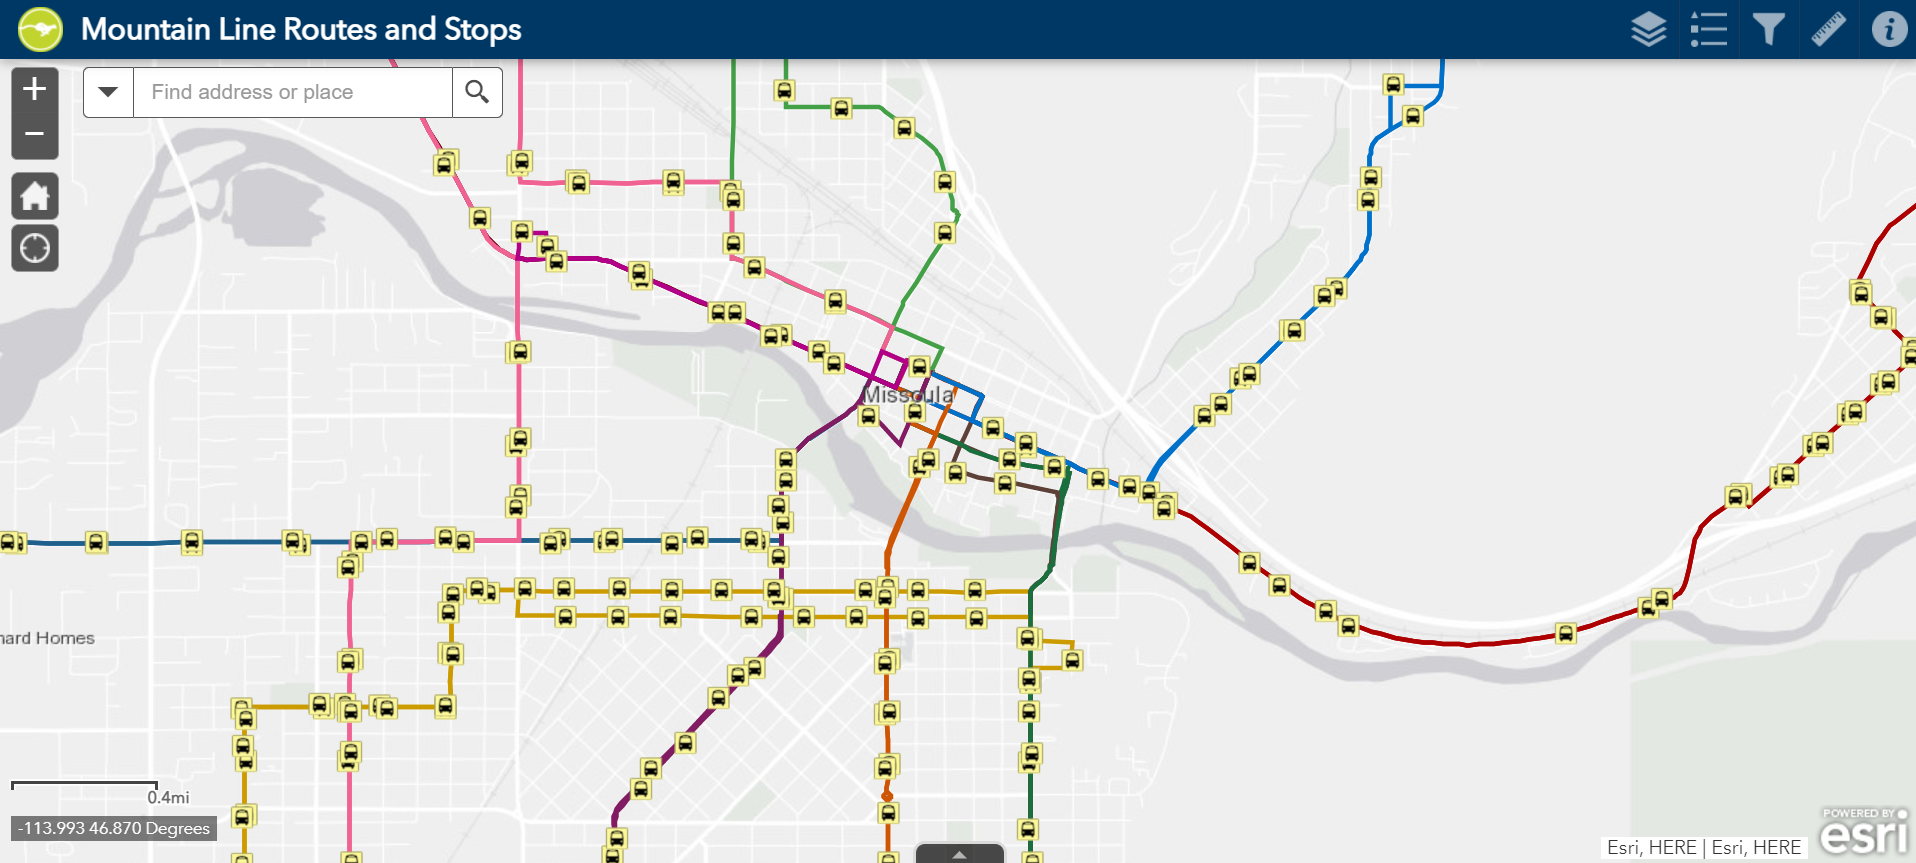
*Mountain Line in Missoula manages a system of 450 bus stops*

# What factors influence transit ridership?
In general, the demand for transportation is related primarily to the distribution of where people live and work (to a lesser extent, where they shop and recreate), and the supply of roadways. Relatively accurate models predicting motor vehicle traffic from population, employment, and demographic data have been in use since the 1960s.  

However, models predicting transit ridership are less well-developed. The demand for transit at a particular location should be expected to have a relationship to many factors, such as:


**Demographic and Socio-economic Factors**
* the number of residents nearby
    * *age of residents*
    * *income level of residents*
    * *family status of residents (families? college students?)*
* the number of jobs nearby
    * *types of jobs (retail? offices? etc.)*
    
**Transit Service Factors**
* the number of bus routes that serve a location
* the frequency of buses that serve a location

**Built Environment Factors**
* the quality and safety of the sidewalk network
* the types of amenities available (seating, rain cover, etc.)


# The Data

### Ridership (target vector)
The Missoula Urban Transportation District, or Mountain Line, collects continuous ridership data on all of its buses. The data is aggregated to individual bus stops and made available to the public via a GIS webmap.

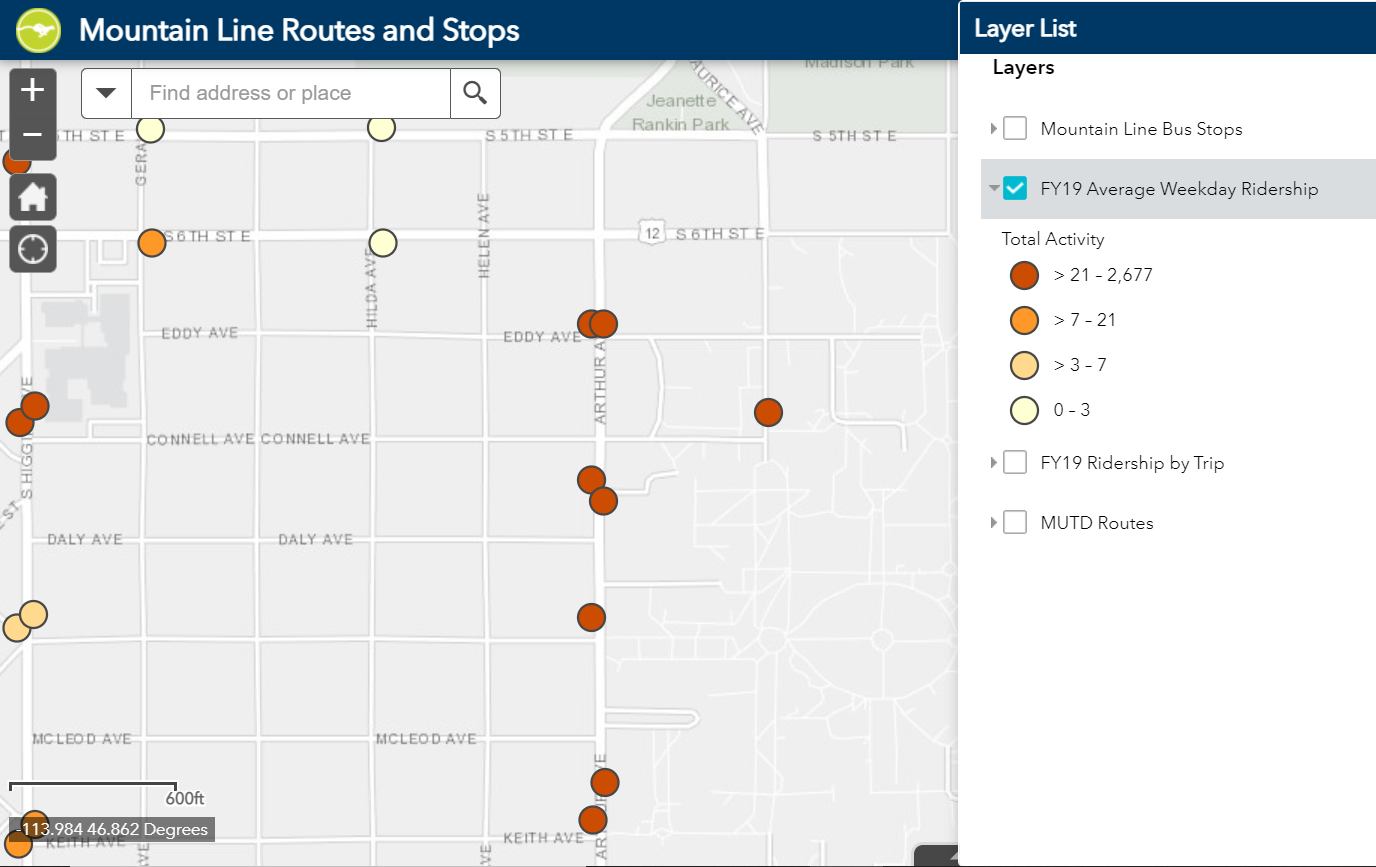

### Employment and Population (**features 'TOTALPOP', 'TOTALJOBS'**)

Mountain Line analyzed employment and population densities in Missoula as part of its 2018 Strategic Plan, from US Census Bureau data. GIS methods (buffer, intersection) were used in this project to calculate the total population and employment within 1/4 mile of each bus stop.  

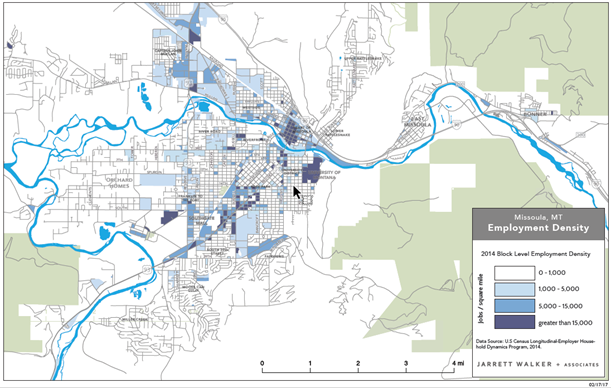

### Transit Service Characteristics (feature 'WKDY_TRIPS')

From Mountain Line core service database, GIS methods were used to calculate the total number of buses that stop at each bus stop during normal weekday service.

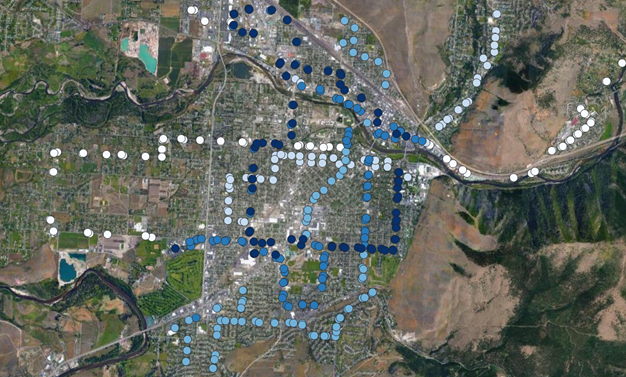

In [2]:
df=pd.read_csv('Stops_PopEmplRidersh.csv')

In [3]:
df.sort_values('WKDAY_TOTAL', ascending=False)

STOP_ID  BUFFER_AREA_SQMI                              STOP_NAME  \
438    17240          0.196148          Mountain Line Transfer Center   
437    17213          0.196148                    Southgate Mall East   
436    17454          0.196148                    Southgate Mall West   
360    17442          0.196148  Great Northern Ave & Union Pacific St   
375    17329          0.196148  Great Northern Ave & Union Pacific St   
..       ...               ...                                    ...   
33     17172          0.196148                 South Ave W & 37th Ave   
224    17443          0.196148              High Park Way & Simons Dr   
55     17402          0.196148                    S 3rd St W & Ash St   
54     17397          0.196148                  S 3rd St W & Short St   
23     17104          0.196148                 S 3rd St W & Walnut St   

     WKDAY_ON  WKDAY_OFF  WKDAY_TOTAL  WKDY_TOTAL_Log  WKDAY_TRIPS  \
438      1298       1379         2677        3.427648          219   
437       230        218          447        2.650308          141   
436       167        208          375        2.574031          128   
360        83         97          180        2.255273           47   
375        95         62          157        2.195900           48   
..        ...        ...          ...             ...          ...   
33          0          0            0        0.000000            6   
224         0          0            0        0.000000           18   
55          0          0            0        0.000000            6   
54          0          0            0        0.000000            6   
23          0          0            0        0.000000            6   

     ON_PER_TRIP  TOTAL_PER_TRIP  ...  SAT_TOTAL          Y           X  \
438         5.93           12.22  ...        856  46.873797 -113.995609   
437         1.63            3.17  ...        162  46.846803 -114.026343   
436         1.30            2.93  ...        149  46.846751 -114.026580   
360         1.77            3.83  ...         66  46.888042 -114.035751   
375         1.98            3.27  ...         57  46.888358 -114.035519   
..           ...             ...  ...        ...        ...         ...   
33          0.00            0.00  ...          0  46.848801 -114.071316   
224         0.00            0.00  ...          0  46.832400 -114.009362   
55          0.00            0.00  ...          0  46.866910 -114.009738   
54          0.00            0.00  ...          0  46.866965 -114.047816   
23          0.00            0.00  ...          0  46.867101 -114.008259   

     TOTALPOP  TOTALJOBS  WKDAY_TRIPS.1  JOB_POP_SQMI  POP_SQMI  JOBS_SQMI  \
438       716       2928            219          3147      3650      14928   
437       672        627            141           768      3426       3197   
436       670        630            128           758      3416       3212   
360       151        425             47           472       770       2167   
375       148        433             48           481       755       2208   
..        ...        ...            ...           ...       ...        ...   
33        171         88              6            94       872        449   
224       364          8             18            26      1856         41   
55       1061        440              6           446      5409       2243   
54        227         88              6            94      1157        449   
23       1015        441              6           447      5175       2248   

     JOB_POP_SQMI.1  
438           18578  
437            6623  
436            6628  
360            2937  
375            2963  
..              ...  
33             1321  
224            1897  
55             7652  
54             1606  
23             7423  

[440 rows x 22 columns]

In [4]:
# drop records where ridership is zero

df.drop(df[df.WKDAY_TOTAL==0].index, inplace=True)

#drop records for the three transfer centers (more complex factors leading to ridership)

df.drop([438,437,436], inplace=True)

In [5]:
# feature matrix X, target vector y
X=df[['WKDAY_TRIPS','TOTALPOP','TOTALJOBS']]
y = df['WKDAY_TOTAL']

In [6]:
X.isnull().sum()

WKDAY_TRIPS    0
TOTALPOP       0
TOTALJOBS      0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

## Examining the Data

<AxesSubplot:ylabel='Frequency'>

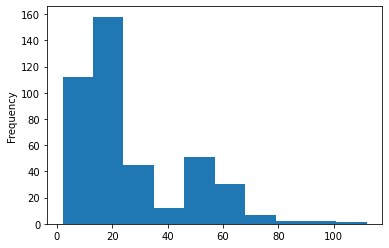

In [8]:
X['WKDAY_TRIPS'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

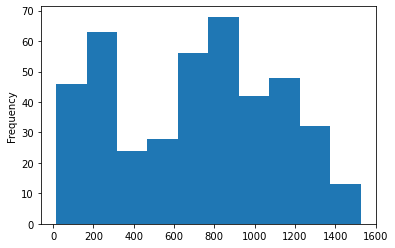

In [11]:
X['TOTALPOP'].plot(kind='hist')

**population data is pretty evenly distributed**

<AxesSubplot:ylabel='Frequency'>

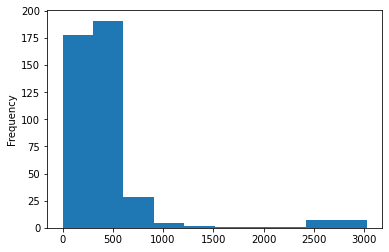

In [12]:
X['TOTALJOBS'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

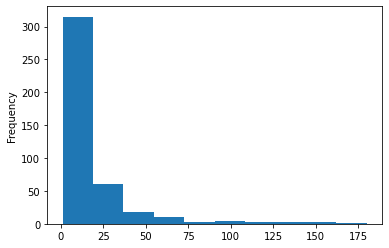

In [9]:
y.plot(kind='hist')

**the vast majority of bus stops have ridership less than 25**

# Linear Regression Models

The features (population, jobs, weekday trips) were chosen because we expect them to relate strongly to the target vector (ridership). If there is in fact a strong relationship, perhaps a linear model will produce good results!

## Linear Regression

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [11]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [12]:
# linear model
lin_reg=LinearRegression()

In [13]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [14]:
y_test_pred=lin_reg.predict(X_test)

In [15]:
# rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_test_pred))

19.767772517967348

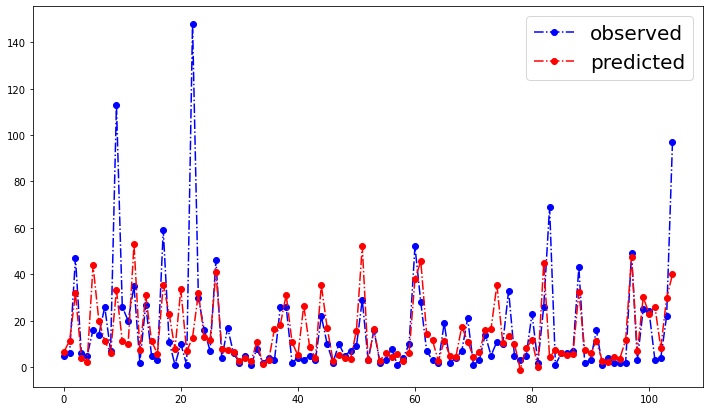

In [16]:
plt.figure(figsize=(12,7))
plt.plot(y_test.to_numpy(), 'b-.o', label='observed')
plt.plot(y_test_pred, 'r-.o', label='predicted')
plt.legend(fontsize=20)

**a linear regression model does a poor job with high-ridership stops**

## Linear regression with polynomial features

In [17]:
# add polynomial features
pipe = Pipeline(steps=[  # 2 steps
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)), #include_bias removes the constant 1 
    ('reg', LinearRegression())
])


In [18]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('reg', LinearRegression())])

In [19]:
y_test_pred=pipe.predict(X_test)

In [20]:
# rmse

np.sqrt(mean_squared_error(y_test, y_test_pred))

19.126031467717503

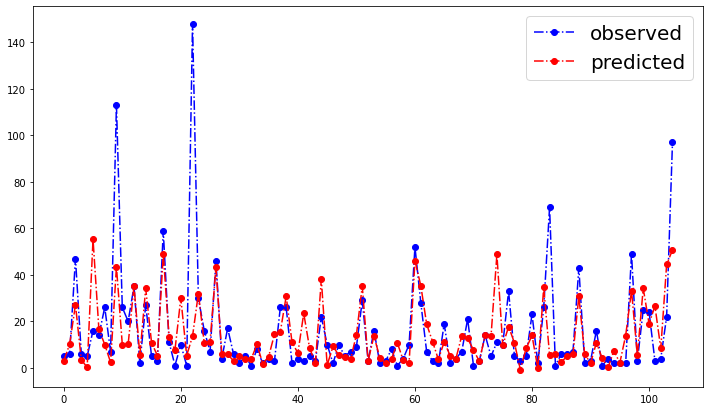

In [21]:
plt.figure(figsize=(12,7))
plt.plot(y_test.to_numpy(), 'b-.o', label='observed')
plt.plot(y_test_pred, 'r-.o', label='predicted')
plt.legend(fontsize=20)

In [22]:
# Ridge regression 
my_degree = 5
alpha = 3

# pipeline
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=my_degree, include_bias=False)), # things will work w/o removing bias, but it's better
    ('scaler', StandardScaler()), # always a good idea when using polynomial features b/c you'd have huge numbers
    ('reg', Ridge(alpha=alpha))
])

# replace lin_reg with pipeline

pipe.fit(X_train,y_train)
    
# Train set mean_squared_erro
y_train_pred = pipe.predict(X_train)
MSE_train = mean_squared_error(y_train,y_train_pred)

# Test set mean_squared_error
y_test_pred = pipe.predict(X_test)
MSE_test = mean_squared_error(y_test,y_test_pred)


In [23]:
parameters = {'reg__alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000],
             'poly__degree': [1,2,3,4,5,10,15,25,50]}

In [24]:
grid = GridSearchCV(pipe,parameters,cv=10,scoring='neg_root_mean_squared_error', n_jobs=-1,verbose=True)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.4s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=5,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('reg', Ridge(alpha=3))]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2, 3, 4, 5, 10, 15, 25, 50],
                         'reg__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                        1000]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [25]:
grid.best_params_

{'poly__degree': 1, 'reg__alpha': 100}

In [26]:
best_pipe=grid.best_estimator_

In [27]:
# best model prediction

y_test_pred=best_pipe.predict(X_test)

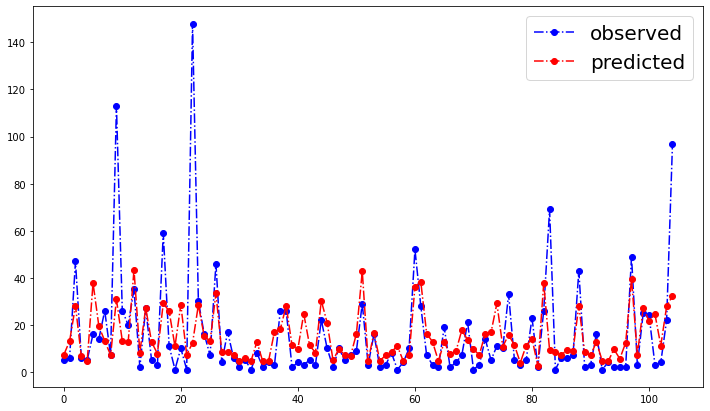

In [28]:
plt.figure(figsize=(12,7))
plt.plot(y_test.to_numpy(), 'b-.o', label='observed')
plt.plot(y_test_pred, 'r-.o', label='predicted')
plt.legend(fontsize=20)

In [29]:
# rmse
np.sqrt(mean_squared_error(y_test,y_test_pred))

19.778505820032887

**polynomial features did not improve the model**

## Examine the coefficients of the polynomial linear regression model

One advantage to linear regression models is that the coefficients can have real-world meaning. I want to see if there was an expected relationship between the target vector and the features. 

In [30]:
# analysis of coefficients
feature_names = pipe['poly'].get_feature_names(X.columns)

In [31]:
# coefficients

coeff = pd.DataFrame(pipe['reg'].coef_, feature_names, columns=['coefficients'])

<AxesSubplot:>

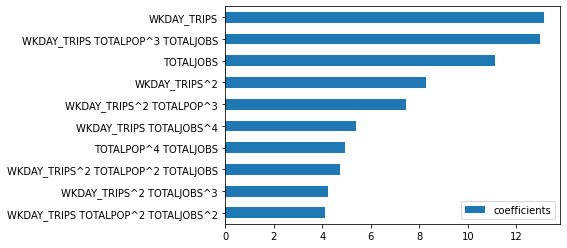

In [32]:
# top 10 positive factors

coeff.sort_values('coefficients').tail(10).plot(kind='barh')

- **As expected, the amount of transit service ('WKDY_TRIPS') had the most significant positive effect on ridership. It was a component of 8 of 10 of the top factors.**

- **Employment ('TOTALJOBS') was also a signficant factor.**

- **Population ('TOTALPOP') had less of an effect - likely because the data was pretty evenly distributed across the bus stop locations.**

<AxesSubplot:>

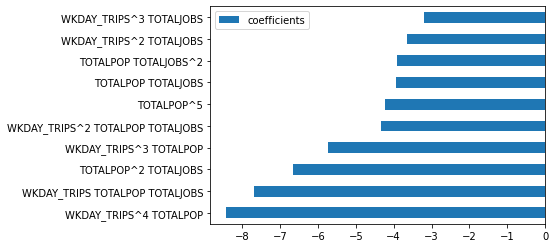

In [33]:
# top 10 negative factors

coeff.sort_values('coefficients').head(10).plot(kind='barh')

# Add new features - major destinations

Transit ridership is significantly affected by the location of destinations like major employment centers and shopping centers.  Based on my understanding of the Missoula community, I've chosen 6 locations below to add to my model.  
   - distance to UofM (Center of Campus)
   - distance to Downtown (Broadway/Higgins)
   - distance to the Poverello Center
   - distance to Walmart - Reserve St
   - distance to Walmart - Mullan Rd
   - distance to Southgate Mall
   - distance to Target
   
**To add these features to my model, I need to calculate the distance from every bus stop to each of the above features.**

To do these calcualtions, I'll use a python library called "geopy".

In [8]:
import geopy.distance

In [9]:
# add new column with (latitude, longitude) pairs

df['lat_long']=df.apply(lambda x:tuple([x.Y,x.X]), axis=1)

**I pulled the coordinates of each destination location from Google Maps (the coordinates of each bus stop were already known).**
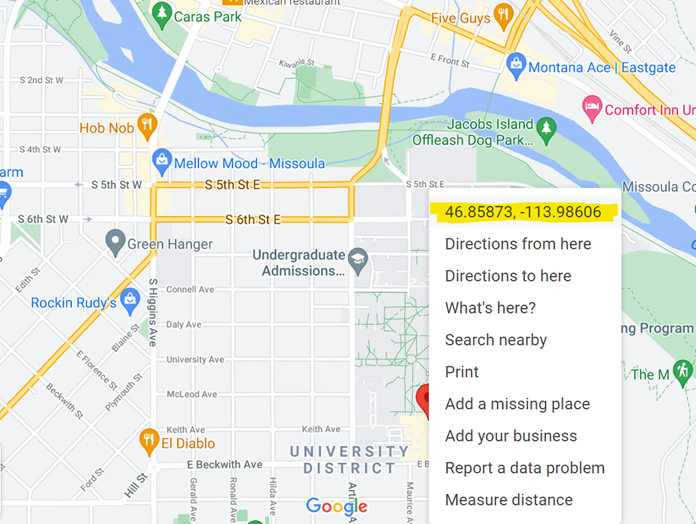

In [10]:
destinations={'UofM':(46.861548411152086, -113.98223618231813),
'Downtown':(46.87229516743107, -113.99405074812826),
'Poverello':(46.876936823136894, -114.0089568294715),
'Walmart_Mullan':(46.88470163545172, -114.04265525992862),
'Walmart_Reserve':(46.831875886920855, -114.04721221335326),
'Southgate Mall':(46.8453844567274, -114.02712547162858),
'Target':(46.88810360532542, -114.03634374275181)}

In [11]:
# put into a DataFrame
destinations_df=pd.DataFrame([list(destinations.values())]*len(df),columns=destinations.keys())
destinations_df


UofM  \
0    (46.861548411152086, -113.98223618231813)   
1    (46.861548411152086, -113.98223618231813)   
2    (46.861548411152086, -113.98223618231813)   
3    (46.861548411152086, -113.98223618231813)   
4    (46.861548411152086, -113.98223618231813)   
..                                         ...   
415  (46.861548411152086, -113.98223618231813)   
416  (46.861548411152086, -113.98223618231813)   
417  (46.861548411152086, -113.98223618231813)   
418  (46.861548411152086, -113.98223618231813)   
419  (46.861548411152086, -113.98223618231813)   

                                     Downtown  \
0    (46.87229516743107, -113.99405074812826)   
1    (46.87229516743107, -113.99405074812826)   
2    (46.87229516743107, -113.99405074812826)   
3    (46.87229516743107, -113.99405074812826)   
4    (46.87229516743107, -113.99405074812826)   
..                                        ...   
415  (46.87229516743107, -113.99405074812826)   
416  (46.87229516743107, -113.99405074812826)   
417  (46.87229516743107, -113.99405074812826)   
418  (46.87229516743107, -113.99405074812826)   
419  (46.87229516743107, -113.99405074812826)   

                                    Poverello  \
0    (46.876936823136894, -114.0089568294715)   
1    (46.876936823136894, -114.0089568294715)   
2    (46.876936823136894, -114.0089568294715)   
3    (46.876936823136894, -114.0089568294715)   
4    (46.876936823136894, -114.0089568294715)   
..                                        ...   
415  (46.876936823136894, -114.0089568294715)   
416  (46.876936823136894, -114.0089568294715)   
417  (46.876936823136894, -114.0089568294715)   
418  (46.876936823136894, -114.0089568294715)   
419  (46.876936823136894, -114.0089568294715)   

                               Walmart_Mullan  \
0    (46.88470163545172, -114.04265525992862)   
1    (46.88470163545172, -114.04265525992862)   
2    (46.88470163545172, -114.04265525992862)   
3    (46.88470163545172, -114.04265525992862)   
4    (46.88470163545172, -114.04265525992862)   
..                                        ...   
415  (46.88470163545172, -114.04265525992862)   
416  (46.88470163545172, -114.04265525992862)   
417  (46.88470163545172, -114.04265525992862)   
418  (46.88470163545172, -114.04265525992862)   
419  (46.88470163545172, -114.04265525992862)   

                               Walmart_Reserve  \
0    (46.831875886920855, -114.04721221335326)   
1    (46.831875886920855, -114.04721221335326)   
2    (46.831875886920855, -114.04721221335326)   
3    (46.831875886920855, -114.04721221335326)   
4    (46.831875886920855, -114.04721221335326)   
..                                         ...   
415  (46.831875886920855, -114.04721221335326)   
416  (46.831875886920855, -114.04721221335326)   
417  (46.831875886920855, -114.04721221335326)   
418  (46.831875886920855, -114.04721221335326)   
419  (46.831875886920855, -114.04721221335326)   

                              Southgate Mall  \
0    (46.8453844567274, -114.02712547162858)   
1    (46.8453844567274, -114.02712547162858)   
2    (46.8453844567274, -114.02712547162858)   
3    (46.8453844567274, -114.02712547162858)   
4    (46.8453844567274, -114.02712547162858)   
..                                       ...   
415  (46.8453844567274, -114.02712547162858)   
416  (46.8453844567274, -114.02712547162858)   
417  (46.8453844567274, -114.02712547162858)   
418  (46.8453844567274, -114.02712547162858)   
419  (46.8453844567274, -114.02712547162858)   

                                       Target  
0    (46.88810360532542, -114.03634374275181)  
1    (46.88810360532542, -114.03634374275181)  
2    (46.88810360532542, -114.03634374275181)  
3    (46.88810360532542, -114.03634374275181)  
4    (46.88810360532542, -114.03634374275181)  
..                                        ...  
415  (46.88810360532542, -114.03634374275181)  
416  (46.88810360532542, -114.03634374275181)  
417  (46.88810360532542, -114.03634374275181)  
418  (46.8881036

In [12]:
# add to df
df.reset_index(inplace=True)
df=df.join(destinations_df)
df

index  STOP_ID  BUFFER_AREA_SQMI                          STOP_NAME  \
0        0    17024          0.196148        N Reserve St & England Blvd   
1        1    17115          0.196148     Expressway & Canyon Creek Blvd   
2        2    17139          0.196148          N Reserve St & Expressway   
3        3    17230          0.196148           Airway Blvd & Harrier Dr   
4        4    17368          0.196148           Majestic Dr & Wheeler Dr   
..     ...      ...               ...                                ...   
415    432    17378          0.196148           South Ave W & S Grant St   
416    433    17475          0.196148  Missoula Community Medical Center   
417    434    17273          0.196148        South Ave W & S Garfield St   
418    435    17126          0.196148               W Main St & Ryman St   
419    439    17195          0.196148                Smoke Jumper Center   

     WKDAY_ON  WKDAY_OFF  WKDAY_TOTAL  WKDY_TOTAL_Log  WKDAY_TRIPS  \
0           2          2            4        0.602060            2   
1           1          0            1        0.000000            2   
2           1          2            3        0.477121            2   
3           0          2            2        0.301030            2   
4           3          0            3        0.477121            2   
..        ...        ...          ...             ...          ...   
415        11          5           15        1.176091           88   
416        49         61          109        2.037426           92   
417        29         16           45        1.653213           94   
418         5         79           85        1.929419          112   
419         4          3            7        0.845098           10   

     ON_PER_TRIP  ...  JOBS_SQMI  JOB_POP_SQMI.1  \
0           1.00  ...        938            2126   
1           0.50  ...        285             815   
2           0.50  ...       1213            2309   
3           0.00  ...        285             591   
4           1.50  ...        285            1147   
..           ...  ...        ...             ...   
415         0.13  ...       3319            7500   
416         0.53  ...        449            1249   
417         0.31  ...       3278            6974   
418         0.04  ...      15437           19021   
419         0.40  ...        285             591   

                               lat_long  \
0            (46.89403229, -114.040944)   
1      (46.915296999999995, -114.06393)   
2              (46.904863, -114.039226)   
3    (46.92152292, -114.06881100000001)   
4            (46.91407453, -114.057115)   
..                                  ...   
415  (46.84892888, -114.02679499999999)   
416          (46.84687699, -114.047625)   
417          (46.84877145, -114.024588)   
418          (46.87203275, -113.995814)   
419  (46.92421673, -114.08798999999999)   

                                          UofM  \
0    (46.861548411152086, -113.98223618231813)   
1    (46.861548411152086, -113.98223618231813)   
2    (46.861548411152086, -113.98223618231813)   
3    (46.861548411152086, -113.98223618231813)   
4    (46.861548411152086, -113.98223618231813)   
..                                         ...   
415  (46.861548411152086, -113.98223618231813)   
416  (46.861548411152086, -113.98223618231813)   
417  (46.861548411152086, -113.98223618231813)   
418  (46.861548411152086, -113.98223618231813)   
419  (46.861548411152086, -113.98223618231813)   

                                     Downtown  \
0    (46.87229516743107, -113.99405074812826)   
1    (46.87229516743107, -113.99405074812826)   
2    (46.87229516743107, -113.99405074812826)   
3    (46.87229516743107, -113.99405074812826)   
4    (46.87229516743107, -113.99405074812826)   
..                                        ...   
415  (46.87229516743107, -113.99405074812826)   
416  (46.87229516743107, -113.99405074812826)   
417  (46.87229516743107, -113.99405074812826)   
418  (46.872295167

In [13]:
[x for x in destinations.keys()]
    

['UofM',
 'Downtown',
 'Poverello',
 'Walmart_Mullan',
 'Walmart_Reserve',
 'Southgate Mall',
 'Target']

In [14]:
# compute distances

for dest in destinations.keys():
    df[dest]=df.apply(lambda x: geopy.distance.distance(x.lat_long,x[dest]).ft, axis=1)


In [15]:
# check that the features were added correctly
df

index  STOP_ID  BUFFER_AREA_SQMI                          STOP_NAME  \
0        0    17024          0.196148        N Reserve St & England Blvd   
1        1    17115          0.196148     Expressway & Canyon Creek Blvd   
2        2    17139          0.196148          N Reserve St & Expressway   
3        3    17230          0.196148           Airway Blvd & Harrier Dr   
4        4    17368          0.196148           Majestic Dr & Wheeler Dr   
..     ...      ...               ...                                ...   
415    432    17378          0.196148           South Ave W & S Grant St   
416    433    17475          0.196148  Missoula Community Medical Center   
417    434    17273          0.196148        South Ave W & S Garfield St   
418    435    17126          0.196148               W Main St & Ryman St   
419    439    17195          0.196148                Smoke Jumper Center   

     WKDAY_ON  WKDAY_OFF  WKDAY_TOTAL  WKDY_TOTAL_Log  WKDAY_TRIPS  \
0           2          2            4        0.602060            2   
1           1          0            1        0.000000            2   
2           1          2            3        0.477121            2   
3           0          2            2        0.301030            2   
4           3          0            3        0.477121            2   
..        ...        ...          ...             ...          ...   
415        11          5           15        1.176091           88   
416        49         61          109        2.037426           92   
417        29         16           45        1.653213           94   
418         5         79           85        1.929419          112   
419         4          3            7        0.845098           10   

     ON_PER_TRIP  ...  JOBS_SQMI  JOB_POP_SQMI.1  \
0           1.00  ...        938            2126   
1           0.50  ...        285             815   
2           0.50  ...       1213            2309   
3           0.00  ...        285             591   
4           1.50  ...        285            1147   
..           ...  ...        ...             ...   
415         0.13  ...       3319            7500   
416         0.53  ...        449            1249   
417         0.31  ...       3278            6974   
418         0.04  ...      15437           19021   
419         0.40  ...        285             591   

                               lat_long          UofM      Downtown  \
0            (46.89403229, -114.040944)  18866.547623  14155.171009   
1      (46.915296999999995, -114.06393)  28312.036345  23478.341102   
2              (46.904863, -114.039226)  21276.293350  16391.835190   
3    (46.92152292, -114.06881100000001)  30774.264543  25917.355720   
4            (46.91407453, -114.057115)  26787.720657  21927.508088   
..                                  ...           ...           ...   
415  (46.84892888, -114.02679499999999)  12061.374097  11820.950486   
416          (46.84687699, -114.047625)  17213.482950  16296.975052   
417          (46.84877145, -114.024588)  11575.898800  11488.073835   
418          (46.87203275, -113.995814)   5114.500070    451.294114   
419  (46.92421673, -114.08798999999999)  34950.966392  30168.820621   

        Poverello  Walmart_Mullan  Walmart_Reserve  Southgate Mall  \
0    10141.834647     3429.932690     22724.159308    18076.637674   
1    19612.299736    12361.605026     30711.795116    27109.279749   
2    12689.476613     7403.208195     26695.097708    21903.447990   
3    22098.551501    14936.801725     33139.813317    29661.789577   
4    18122.825355    11306.534578     30082.091812    26151.587418   
..            ...             ...              ...             ...   
415  11147.376448    13637.093583      8049.466086     1295.378415   
416  14621.166057    13851.500825      5472.229361     5158.665665   
417  10991.708426    13862.083600      8368.565597     1388.956665   
418   3742.288939    12593.030248     19491.203630    12483.214277   
419

# Linear Regression w/ Destination Features (10 features total)

In [42]:
# new feature matrix X, target vector y
X=df[list(destinations.keys())+['WKDAY_TRIPS','TOTALPOP','TOTALJOBS']]
y = df['WKDAY_TOTAL']

In [43]:
y

0        4
1        1
2        3
3        2
4        3
      ... 
415     15
416    109
417     45
418     85
419      7
Name: WKDAY_TOTAL, Length: 420, dtype: int64

In [44]:
# new train test split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [45]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [46]:
y_test_pred=lin_reg.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_test_pred))


20.18641693908255

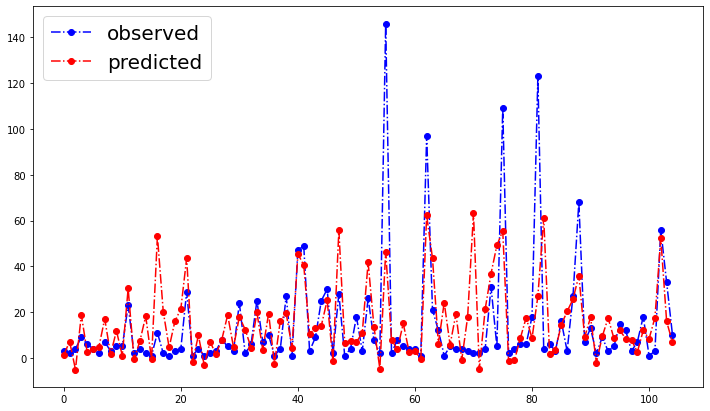

In [48]:
plt.figure(figsize=(12,7))
plt.plot(y_test.to_numpy(), 'b-.o', label='observed')
plt.plot(y_test_pred, 'r-.o', label='predicted')
plt.legend(fontsize=20)

Ridge - grid search **hangs**

In [49]:
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), # things will work w/o removing bias, but it's better
    ('scaler', StandardScaler()), # always a good idea when using polynomial features b/c you'd have huge numbers
    ('reg', Ridge(alpha=1))
])

pipe.fit(X_train,y_train)


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', Ridge(alpha=1))])

In [50]:
"""
parameters = {'reg__alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000],
             'poly__degree': [1,2,3,4,5,10,15,25,50]}

grid = GridSearchCV(pipe,parameters,cv=5,scoring='neg_root_mean_squared_error', n_jobs=-1,verbose=True)
grid.fit(X_train,y_train)
"""

"\nparameters = {'reg__alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000],\n             'poly__degree': [1,2,3,4,5,10,15,25,50]}\n\ngrid = GridSearchCV(pipe,parameters,cv=5,scoring='neg_root_mean_squared_error', n_jobs=-1,verbose=True)\ngrid.fit(X_train,y_train)\n"

# Random Forest Regression Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf_regressor = RandomForestRegressor(n_estimators = 20, random_state=1)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=1)

In [53]:
y_test_pred = rf_regressor.predict(X_test)

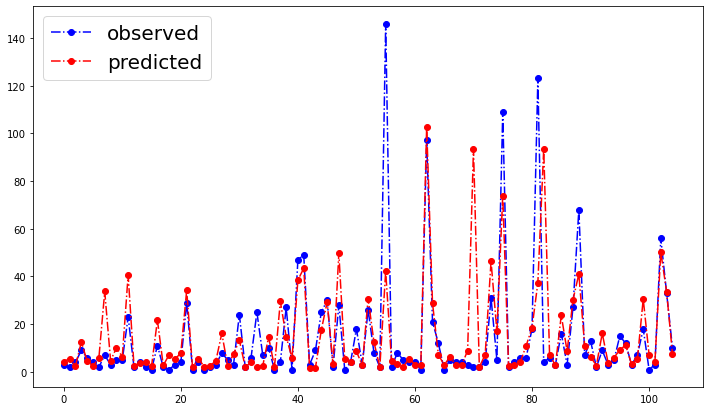

In [54]:
plt.figure(figsize=(12,7))
plt.plot(y_test.to_numpy(), 'b-.o', label='observed')
plt.plot(y_test_pred, 'r-.o', label='predicted')
plt.legend(fontsize=20)

In [55]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

19.845657435510144

## Tune the parameters

In [56]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [57]:
# setup grid search
grid = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

In [58]:
# best parameters
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

In [59]:
best_params

{'max_depth': 6, 'n_estimators': 100}

In [60]:
rf_regressor=RandomForestRegressor(n_estimators = best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=False)

In [61]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=False)

In [62]:
y_test_pred = rf_regressor.predict(X_test)

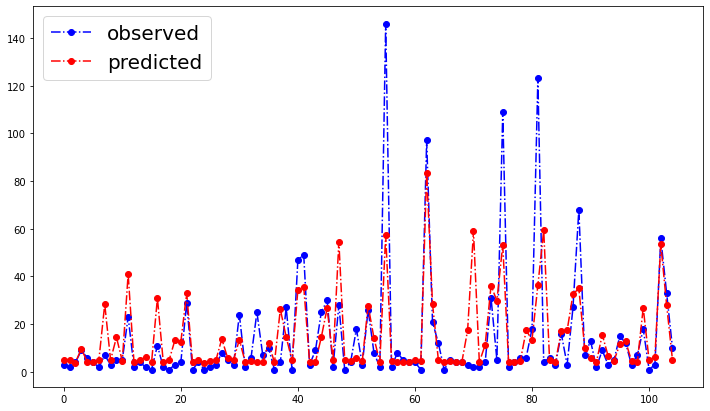

In [63]:
plt.figure(figsize=(12,7))
plt.plot(y_test.to_numpy(), 'b-.o', label='observed')
plt.plot(y_test_pred, 'r-.o', label='predicted')
plt.legend(fontsize=20)

In [64]:
# rmse
np.sqrt(mean_squared_error(y_test,y_test_pred))

17.487803438210445

# Add new features - more economic and population data

I discussed this project with the the Missoula Metropolitan Planning Organization (MPO), which oversees transportation planning in the Missoula region. They offered some additional data to help improve the model:

- retail employment
- service employment
- base employment
- healthcare employment
- leisure employment
- total households
- average household size
- median income

## Data processing

The MPO's data was block-level geospatial data. I used GIS methods (buffer, intersection) to calculate values for each feature within 1/4 mile of each bus stop. 

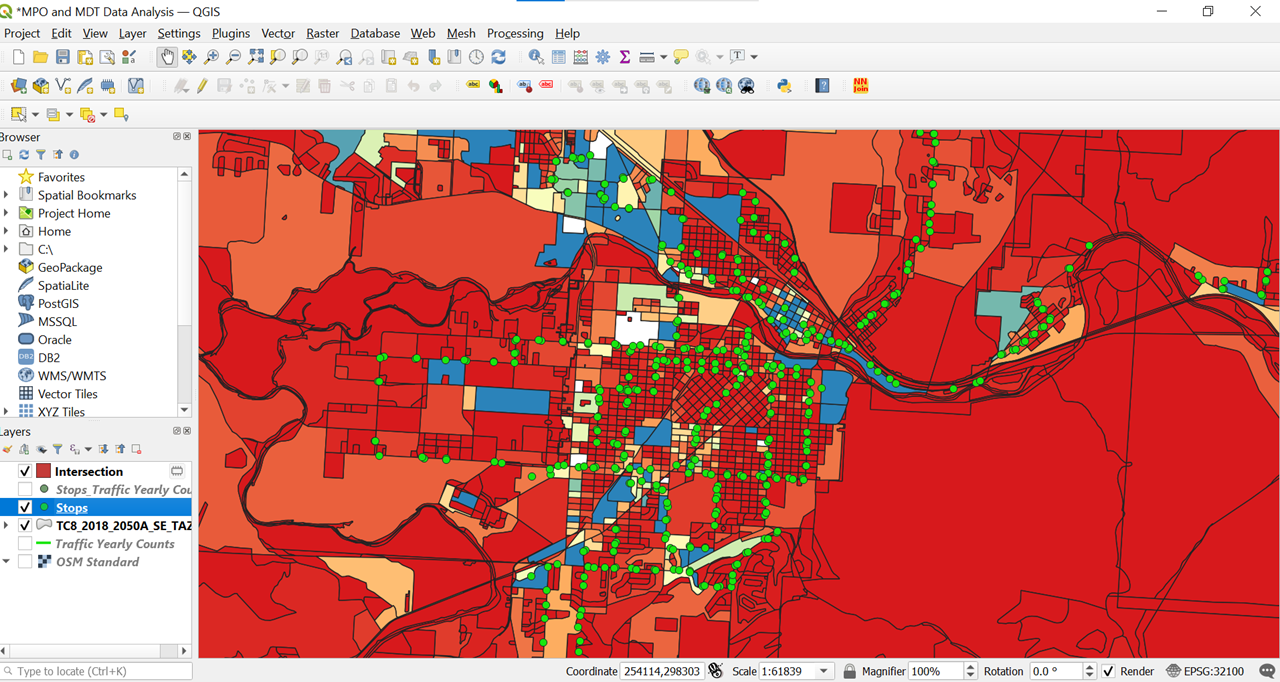

*a screenshot from QGIS, an open-source geospatial analysis package*

In [16]:
new_data=pd.read_csv('MPO_Data.csv')
new_data.head()

Stop ID  Total_HH   HH_Size   Med_Income  Educ_Emp  Base_Emp  Service_Emp  \
0    17001       654  1.256207  19454.00000        18        83          310   
1    17005      1152  2.248333  48649.75000        92        22           78   
2    17006       574  2.281176  32982.35294         0        29          144   
3    17007      1962  1.481458  18767.25000       106       332         1410   
4    17008       740  2.172800  35808.78000       315        45          154   

   Ret_Emp  Leis_Emp  HC_Emp  
0      125       121     283  
1        3         4      24  
2      116       152       0  
3      648       391     616  
4       45       129     751

In [17]:
df=df.join(new_data.set_index('Stop ID'),on='STOP_ID')

# Random Forest with additional features (19 features total)

In [67]:
# new feature matrix X, target vector y
X=df[list(destinations.keys())+['WKDAY_TRIPS','TOTALPOP','TOTALJOBS']+list(new_data.columns)[1:]]
y = df['WKDAY_TOTAL']

In [68]:
# new train test split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [69]:
# setup grid search
grid = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

In [70]:
# best parameters
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

In [71]:
best_params

{'max_depth': 3, 'n_estimators': 50}

In [72]:
rf_regressor=RandomForestRegressor(n_estimators = best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=False)

In [73]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=50, random_state=False)

In [74]:
y_test_pred = rf_regressor.predict(X_test)

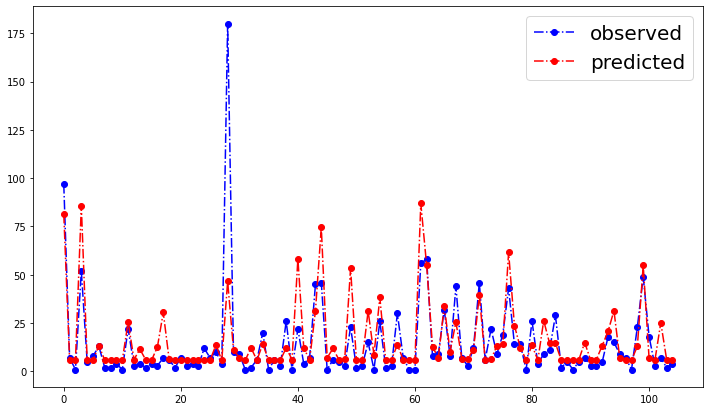

In [75]:
plt.figure(figsize=(12,7))
plt.plot(y_test.to_numpy(), 'b-.o', label='observed')
plt.plot(y_test_pred, 'r-.o', label='predicted')
plt.legend(fontsize=20)

In [76]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

16.528602539950167

# Add new features - traffic data

The volume of motor vehicle traffic adjacent to a bus stop indicates the demand for vehicle transportation at that location. It seems likely that this would be related to the demand for transit, and that this data would improve my model. 

The Montana Department of Transportation (MDT) maintains a system of continous traffic counters throughout the state, which it supplements with annual short-term counts to develop a model of average annual traffic flows on most arterial and collector streets in the state. 

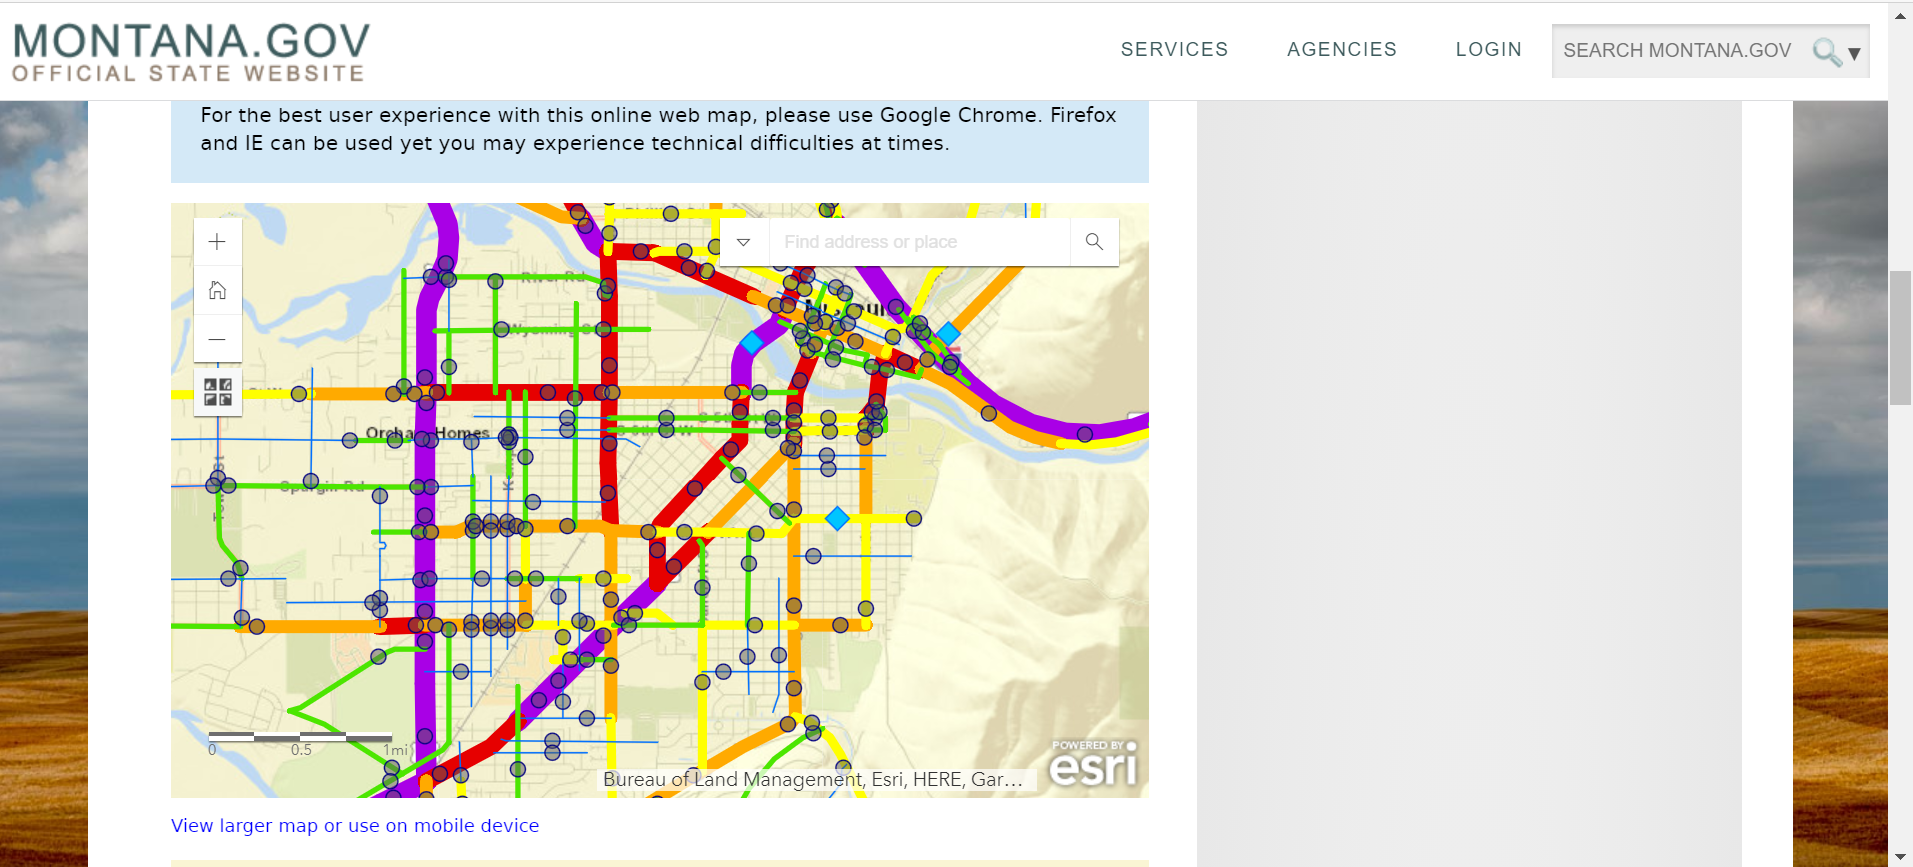

The data is made available as an ArcGIS feature service. I imported the data into QGIS and used a nearest neighbor analysis to attach the traffic counts to the bus stop locations.

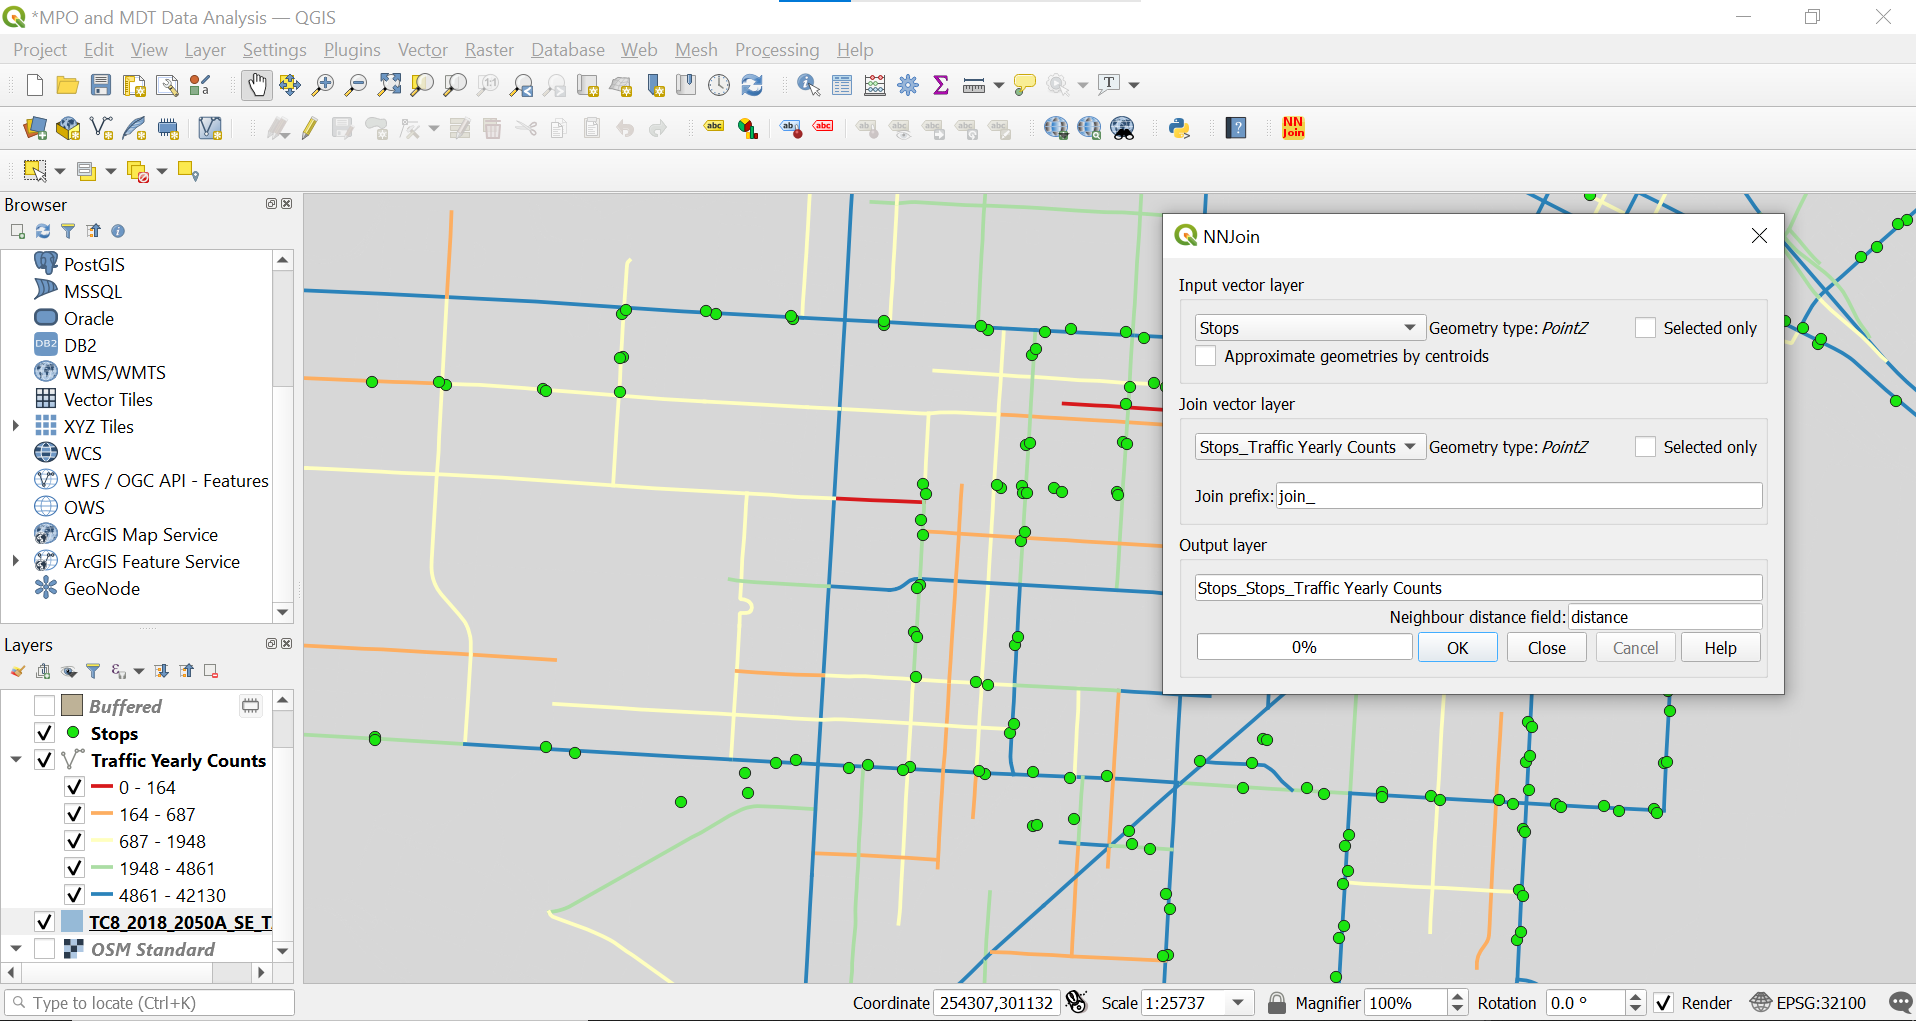

In [18]:
traffic_data=pd.read_csv('Stops_AADT.csv')

In [19]:
traffic_data

STOP_ID   AADT
0      17024   4982
1      17115   5887
2      17139  27889
3      17230   6435
4      17368   8015
..       ...    ...
435    17126   2137
436    17454   6599
437    17213   6599
438    17240    893
439    17195  15278

[440 rows x 2 columns]

In [20]:
df=df.join(traffic_data.set_index('STOP_ID'),on='STOP_ID')

In [21]:
# new feature matrix X, target vector y
X=df[list(destinations.keys())+['WKDAY_TRIPS','TOTALPOP','TOTALJOBS']+list(new_data.columns)[1:]+['AADT']]
y = df['WKDAY_TOTAL']

In [22]:
# new train test split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [82]:
# setup grid search
grid = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

In [83]:
# best parameters
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

In [84]:
best_params

{'max_depth': 6, 'n_estimators': 50}

In [85]:
rf_regressor=RandomForestRegressor(n_estimators = best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=False)

In [86]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=50, random_state=False)

In [87]:
y_test_pred = rf_regressor.predict(X_test)

In [89]:
# RMSE

np.sqrt(mean_squared_error(y_test,y_test_pred))

14.125778384375185

**this is the best result yet! But it's still not very good, given the range of values in the data.**

# Categorize the Data (Quartile Classification)

Mountain Line visualizes its bus stop ridership in quartiles in order to aid in decision making. For example, when assessing whether a bus stop has enough ridership to warrant the installation of a bus shelter, they look to see if the bus stop is in the top 25%.  

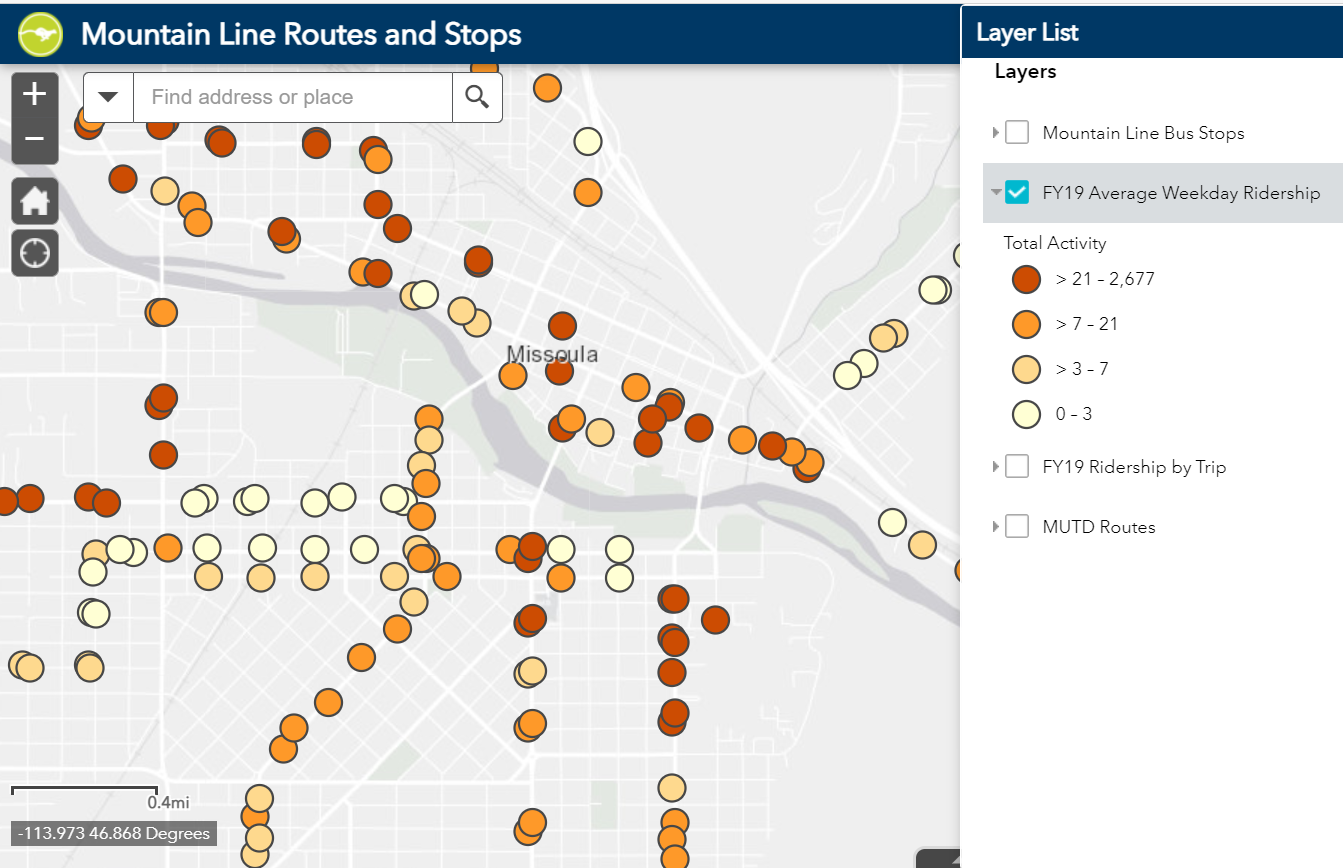

*Mountain Line's webmap shows ridership in quartiles*

**So, perhaps my model could have better accuracy if I only ask it to predict quartiles!**

In [27]:
# transform the target vector into quartiles
y=pd.qcut(y,4,labels=False)

In [28]:
# new train test split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [99]:
# setup grid search
grid = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

In [100]:
# best parameters
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

In [101]:
best_params

{'max_depth': 5, 'n_estimators': 50}

In [102]:
rf_regressor=RandomForestRegressor(n_estimators = best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=False)

In [103]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=False)

In [104]:
y_test_pred = rf_regressor.predict(X_test)

In [107]:
y_test_pred=np.round(y_test_pred)

In [116]:
# % correct
np.sum((y_test==y_test_pred))/len(y_test)

0.4

In [118]:
# confusion matrix
cm = np.zeros((len(np.unique(y_test)),len(np.unique(y_test))))

for i in np.unique(y_test):
    for j in np.unique(y_test):
        cm[i,j]=np.sum(y_test[y_test_pred==j]==i) 

In [119]:
cm

array([[ 6., 14.,  1.,  0.],
       [ 9., 15., 10.,  0.],
       [ 1., 11.,  5.,  7.],
       [ 1.,  2.,  7., 16.]])

**The model does the best predicting quartile 4 (high ridership areas), but overall performs poorly.**

### Use RandomForestClassifer (instead of Regression)

Above, I rounded the results of the Random Forest Regression model to classify the quartiles. Perhaps, the RandomForestClassifer() will produce better results.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# setup grid search
grid = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

In [30]:
# best parameters
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

In [31]:
rf_classifier=RandomForestClassifier(n_estimators = best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=False)

In [32]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=1000, random_state=False)

In [33]:
y_test_pred = rf_classifier.predict(X_test)

In [34]:
# % correct
100*np.sum((y_test==y_test_pred))/len(y_test)

60.95238095238095

In [35]:
# confusion matrix
cm = np.zeros((len(np.unique(y_test)),len(np.unique(y_test))))

for i in np.unique(y_test):
    for j in np.unique(y_test):
        cm[i,j]=np.sum(y_test[y_test_pred==j]==i) 

In [36]:
cm

array([[23., 10.,  2.,  1.],
       [ 8., 13.,  2.,  2.],
       [ 3.,  5.,  9.,  2.],
       [ 0.,  0.,  6., 19.]])

**Better results!  The model is pretty good at classifying stops at the high and low end of the range (79% and 68% accuracy, respectively), but still not very accurate.**

# Summary of Model Results

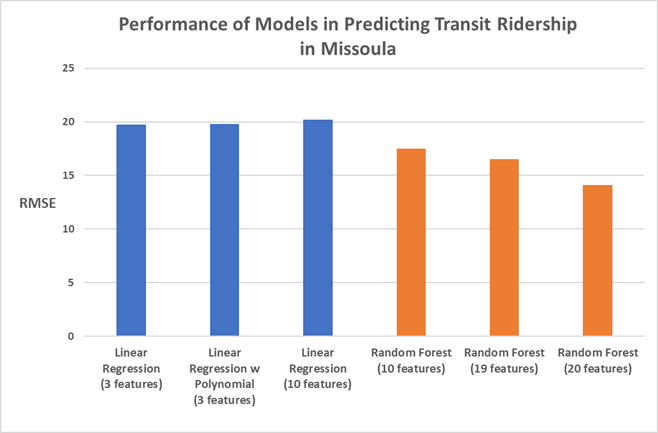

**For a useful predictive model, I'd want RMSE to be much closer to 0.**

## Analysis of my best model (Random Forest with 20 features)
### *How good is my best model?*

Below are the results from **10 runs** of my best Random Forest regression and classification models.

To get a better sense of the error in the regression model, I calculated the **mean absolute error**. By squaring the errors before we calculate their mean, the RMSE gives more weight to large but rare errors - which often occurs with this dataset. 

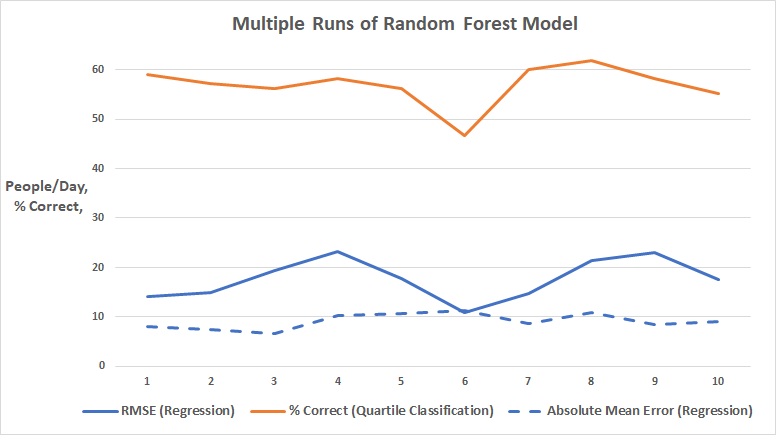

The average absolute mean error is 9.17, with a range from 6.72 to 11.34. This is quite high for the data, which has a mean of 16. 

Additionally, the range of both regression errors is quite large - the high value is almost 2x the low value. This indicates that the Random Forest regression model is **overfitting the data**. Classification smooths out this effect.   

# Next Steps to Improve the Predictive Model 

This model might be improved by:
* better traffic data
* additional transit system data (shelter, number fo routes serving a stop, etc.)
* try different predictive models (i.e. neural networks)

# Conclusions

- Transit ridership in Missoula is not easily predicted from the selected economic, population, and transit service data.
- Random Forest models do a better job on this problem than linear regression.

### Suggestions for future resesarch:
- I'd expect a model of this type to work better in a city with a higher population and higher % of trips that are made by transit. 
- Transit ridership is so low in Missoula (<3% of all trips), that ridership at particular locations is dominated by random factors such as where individual people live, where they happen to have appointments, etc.

### This method could be applied to similar kinds of business problems:
- geospatial prediction problems (i.e., "where should I locate a store to maximize revenues?")